Mohammed Faraz Ali
Problem 9, 2D AdaBoost

The following solution is for
when Below line A is Blue,
when Right of line B is Blue (which means Above line B is Blue),
when Below line C is Blue,
when Below line D is Blue,

**Note: The Points can be anywhere and the program automatically calculates which points are above and below the line and which is the best Classifier**

The error 1 gets converted to 3
The error 3 gets converted to 5

In [55]:
import numpy as np
import operator
import os
import cv2
import re
import pylab as pl
from fnmatch import fnmatch
from IPython.core.display import Image
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage

In [56]:
#Creating A White Image and Initializing Points and Lines

img = np.ones((512,512,3), np.uint8)
img=img*255     # Creating White Image

Points=dict()
Points['1']=[np.array([180,100]),(255,0,0),1]    #Points Location,Color,Weight
Points['2']=[np.array([100,200]),(255,0,0),1]
Points['3']=[np.array([300,150]),(255,0,0),1]
Points['4']=[np.array([350,50]),(0,0,255),1]
Points['5']=[np.array([400,200]),(0,0,255),1]
Points['6']=[np.array([280,300]),(0,0,250),1]
Points['7']=[np.array([200,400]),(255,0,0),1]
Points['8']=[np.array([300,420]),(0,0,255),1]
Points['9']=[np.array([370,320]),(0,0,255),1]


A1=np.array([0,10])     #Line A Coordinates
A2=np.array([500,350])

B1=np.array([240,1])      #Line B Coordinates
B2=np.array([240,500])

C1=np.array([10,250])     #Line C Coordinates
C2=np.array([500,250])

D1=np.array([10,300])     #Line D Coordinates
D2=np.array([500,125])

thresh=np.array([10,10]) #some threshold for displaying text

Lines=dict()
Lines['A']=(A1,A2)
Lines['B']=(B1,B2)
Lines['C']=(C1,C2)
Lines['D']=(D1,D2)

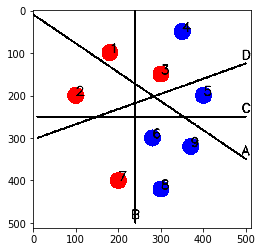

In [57]:
#Plotiing Points and Lines on White Image
font = cv2.FONT_HERSHEY_SIMPLEX

#Displaying Points as circles on white Image
for keys in Points:
    img = cv2.circle(img,tuple(Points[keys][0]), 20, Points[keys][1], -1)
    cv2.putText(img,keys,tuple(Points[keys][0]), font, 1,(0,0,0),2,cv2.LINE_AA)
    
#Displaying Lines on white Image    
for keys in Lines:
    img = cv2.line(img,tuple(Lines[keys][0]),tuple(Lines[keys][1]),(0,0,0),3)
    cv2.putText(img,keys,tuple(Lines[keys][1]-thresh), font, 1,(0,0,0),2,cv2.LINE_AA)


plt.imshow(img)


In [58]:
#Calculating weak and strong Classifiers
s=[0,0,0,0]  #for adding errors 
et=dict()    #Storing those errors wrt classifiers
i=0
del Lines['B']# We have to remove B because it is  given Right of line B is Blue and not left so we have to make a different loop for B
for akeys in Lines:
    
    print("\n*****BELOW LINE %s is BLUE*****\n" %akeys)
    for keys in Points:
        if np.cross(Points[keys][0]-Lines[akeys][0], Lines[akeys][1]-Lines[akeys][0]) < 0:
            print("Point %s lies Below line %s" %(keys,akeys))
            if Points[keys][1]==(255,0,0):  #is RED
                print("And since it is RED, This is Error")#Then Increase its weight
                print("\n")
                s[i]=s[i]+Points[keys][2]
        else:
            print("Point %s lies Above line %s" %(keys,akeys))
            if Points[keys][1]==(0,0,255):
                print("And since it is BLUE, This is Error")#Then Increase its weight
                print("\n")
                s[i]=s[i]+Points[keys][2]
    print("Total error for Classisfier %s is %d"%(akeys,s[i]))
    et[akeys]=s[i]
    i+=1
    
                
                
print("\n*****Right of LINE B is BLUE*****\n")
for keys in Points:
    if np.cross(Points[keys][0]-B1, B2-B1) < 0:
        print("Point %s lies Left line B" %keys)
        if Points[keys][1]==(0,0,255):#is BLUE
            print("And since it is BLUE, This is Error")#Then Increase its weight
            print("\n")
            s[3]=s[3]+Points[keys][2]
    else:
        print("Point %s lies Right line B" %keys)
        if Points[keys][1]==(255,0,0):#is RED
            print("And since it is RED, This Error")#Then Increase its weight
            s[3]=s[3]+Points[keys][2]
print("Total error for Classisfier B is ",s[3])
et["B"]=s[3]
print("\n")
print(et)
Best=min(et, key=et.get)
print("The Best Classifier is",Best)
Lines['B']=(B1,B2) #Adding B now


*****BELOW LINE C is BLUE*****

Point 6 lies Below line C
Point 9 lies Below line C
Point 1 lies Above line C
Point 8 lies Below line C
Point 5 lies Above line C
And since it is BLUE, This is Error


Point 3 lies Above line C
Point 2 lies Above line C
Point 7 lies Below line C
And since it is RED, This is Error


Point 4 lies Above line C
And since it is BLUE, This is Error


Total error for Classisfier C is 3

*****BELOW LINE A is BLUE*****

Point 6 lies Below line A
Point 9 lies Below line A
Point 1 lies Above line A
Point 8 lies Below line A
Point 5 lies Above line A
And since it is BLUE, This is Error


Point 3 lies Above line A
Point 2 lies Below line A
And since it is RED, This is Error


Point 7 lies Below line A
And since it is RED, This is Error


Point 4 lies Above line A
And since it is BLUE, This is Error


Total error for Classisfier A is 4

*****BELOW LINE D is BLUE*****

Point 6 lies Below line D
Point 9 lies Below line D
Point 1 lies Above line D
Point 8 lies Below lin

In [59]:
#Boosting for Best Classifier

print("Now Increasing error according to Best Classifier ")
for keys in Points:
    if np.cross(Points[keys][0]-Lines[Best][0], Lines[Best][1]-Lines[Best][0]) < 0:
        print("Point %s lies Left of line B" %keys)
        if Points[keys][1]==(0,0,255):#is BLUE
            Points[keys][2]+=2
            print("And since it is BLUE, Increasing weight to ",Points[keys][2])#Then Increase its weight
            print("\n")
    else:
        print("Point %s lies Right of line B" %keys)
        if Points[keys][1]==(255,0,0):#is RED
            Points[keys][2]+=2
            print("And since it is RED, Increasing weight to ",Points[keys][2])#Then Increase its weight
            print("\n")



Now Increasing error according to Best Classifier 
Point 6 lies Right of line B
Point 9 lies Right of line B
Point 1 lies Left of line B
Point 8 lies Right of line B
Point 5 lies Right of line B
Point 3 lies Right of line B
And since it is RED, Increasing weight to  3


Point 2 lies Left of line B
Point 7 lies Left of line B
Point 4 lies Right of line B


In [60]:
#Deleting the best classifier and then Finding weak and strong Classifiers again
print("DELETING THE BEST CLASSIFIER AND FINDING WEAK AND STRONG CLASSIFIERS AGAIN")
del Lines[Best]
s=[0,0,0]  #for adding errors 
et=dict()    #Storing those errors wrt classifiers
i=0
for akeys in Lines:
    
    print("\n*****BELOW LINE %s is BLUE*****\n" %akeys)
    for keys in Points:
        if np.cross(Points[keys][0]-Lines[akeys][0], Lines[akeys][1]-Lines[akeys][0]) < 0:
            print("Point %s lies Below line %s" %(keys,akeys))
            if Points[keys][1]==(255,0,0):  #is RED
                print("And since it is RED, This is Error")#Then Increase its weight
                print("\n")
                s[i]=s[i]+Points[keys][2]
        else:
            print("Point %s lies Above line %s" %(keys,akeys))
            if Points[keys][1]==(0,0,255): #is Blue
                print("And since it is BLUE, This is Error")#Then Increase its weight
                print("\n")
                s[i]=s[i]+Points[keys][2]
    print("Total error for Classisfier %s is %d"%(akeys,s[i]))
    et[akeys]=s[i]
    i+=1
print("\n")
print(et)
Best=min(et, key=et.get)
print("The Best Classifier is",Best)

DELETING THE BEST CLASSIFIER AND FINDING WEAK AND STRONG CLASSIFIERS AGAIN

*****BELOW LINE C is BLUE*****

Point 6 lies Below line C
Point 9 lies Below line C
Point 1 lies Above line C
Point 8 lies Below line C
Point 5 lies Above line C
And since it is BLUE, This is Error


Point 3 lies Above line C
Point 2 lies Above line C
Point 7 lies Below line C
And since it is RED, This is Error


Point 4 lies Above line C
And since it is BLUE, This is Error


Total error for Classisfier C is 3

*****BELOW LINE A is BLUE*****

Point 6 lies Below line A
Point 9 lies Below line A
Point 1 lies Above line A
Point 8 lies Below line A
Point 5 lies Above line A
And since it is BLUE, This is Error


Point 3 lies Above line A
Point 2 lies Below line A
And since it is RED, This is Error


Point 7 lies Below line A
And since it is RED, This is Error


Point 4 lies Above line A
And since it is BLUE, This is Error


Total error for Classisfier A is 4

*****BELOW LINE D is BLUE*****

Point 6 lies Below line D

In [61]:
#Boosting for Best Classifier
print("Now Increasing error according to Best Classifier ")
for keys in Points:
    if np.cross(Points[keys][0]-Lines[Best][0], Lines[Best][1]-Lines[Best][0]) < 0:
        print("Point %s lies Below line" %keys)
        if Points[keys][1]==(255,0,0):  #is RED
            Points[keys][2]+=2
            print("And since it is RED, Increasing weight to ",Points[keys][2])#Then Increase its weight
            print("\n")
    else:
        print("Point %s lies Above line" %keys)
        if Points[keys][1]==(0,0,255): #is Blue
            Points[keys][2]+=2
            print("And since it is BLUE, Increasing weight to ",Points[keys][2])#Then Increase its weight
            print("\n")


Now Increasing error according to Best Classifier 
Point 6 lies Below line
Point 9 lies Below line
Point 1 lies Above line
Point 8 lies Below line
Point 5 lies Below line
Point 3 lies Above line
Point 2 lies Above line
Point 7 lies Below line
And since it is RED, Increasing weight to  3


Point 4 lies Above line
And since it is BLUE, Increasing weight to  3




In [62]:
#Deleting the best classifier and then Finding weak and strong Classifiers again
print("DELETING THE BEST CLASSIFIER AND FINDING WEAK AND STRONG CLASSIFIERS AGAIN")
del Lines[Best]
s=[0,0]  #for adding errors 
et=dict()    #Storing those errors wrt classifiers
i=0
for akeys in Lines:
    
    print("\n*****BELOW LINE %s is BLUE*****\n" %akeys)
    for keys in Points:
        if np.cross(Points[keys][0]-Lines[akeys][0], Lines[akeys][1]-Lines[akeys][0]) < 0:
            print("Point %s lies Below line %s" %(keys,akeys))
            if Points[keys][1]==(255,0,0):  #is RED
                print("And since it is RED, This is Error")#Then Increase its weight
                print("\n")
                s[i]=s[i]+Points[keys][2]
        else:
            print("Point %s lies Above line %s" %(keys,akeys))
            if Points[keys][1]==(0,0,255): #is Blue
                print("And since it is BLUE, This is Error")#Then Increase its weight
                print("\n")
                s[i]=s[i]+Points[keys][2]
    print("Total error for Classisfier %s is %d"%(akeys,s[i]))
    et[akeys]=s[i]
    i+=1
print("\n")
print(et)
Best=min(et, key=et.get)
print("The Best Classifier is",Best)

DELETING THE BEST CLASSIFIER AND FINDING WEAK AND STRONG CLASSIFIERS AGAIN

*****BELOW LINE C is BLUE*****

Point 6 lies Below line C
Point 9 lies Below line C
Point 1 lies Above line C
Point 8 lies Below line C
Point 5 lies Above line C
And since it is BLUE, This is Error


Point 3 lies Above line C
Point 2 lies Above line C
Point 7 lies Below line C
And since it is RED, This is Error


Point 4 lies Above line C
And since it is BLUE, This is Error


Total error for Classisfier C is 7

*****BELOW LINE A is BLUE*****

Point 6 lies Below line A
Point 9 lies Below line A
Point 1 lies Above line A
Point 8 lies Below line A
Point 5 lies Above line A
And since it is BLUE, This is Error


Point 3 lies Above line A
Point 2 lies Below line A
And since it is RED, This is Error


Point 7 lies Below line A
And since it is RED, This is Error


Point 4 lies Above line A
And since it is BLUE, This is Error


Total error for Classisfier A is 8


{'C': 7, 'A': 8}
The Best Classifier is C
